In [1]:
import torchvision
from torch import nn
import pathlib
import matplotlib.pyplot as plt
import utils
from dataloaders_task4 import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
import os

In [2]:
class Model(nn.Module):
    def __init__(self): 
        super().__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512, 10)  # No need to apply softmax,
                                            # as this is done in nn.CrossEntropyLoss
        for param in self.model.parameters(): # Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters(): # Unfreeze the last fully-connected
            param.requires_grad = True # layer
        for param in self.model.layer4.parameters(): # Unfreeze the last 5 convolutional
            param.requires_grad = True # layers
            
    def forward(self, x):
        x = self.model(x)
        return x

In [7]:
epochs = 10
batch_size = 32
learning_rate = 5e-4
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = Model()
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders,
    optimizer = "Adam"
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [8]:
trainer.load_best_model()
model = trainer.model
dataloader_train, dataloader_val, dataloader_test = dataloaders
train_loss, train_acc = compute_loss_and_accuracy(
    dataloader_train, model, nn.CrossEntropyLoss()
)
validation_loss, validation_acc = compute_loss_and_accuracy(
    dataloader_val, model, nn.CrossEntropyLoss()
)
test_loss, test_acc = compute_loss_and_accuracy(
    dataloader_test, model, nn.CrossEntropyLoss()
)
print("Best model training loss:", train_loss)
print("Best model training accuracy:", train_acc)
print("Best model validation accuracy:", validation_acc)
print("Best model test accuracy:", test_acc)

Best model training loss: 0.07393458817014405
Best model training accuracy: 0.9753956258890469
Best model validation accuracy: 0.8988
Best model test accuracy: 0.8872


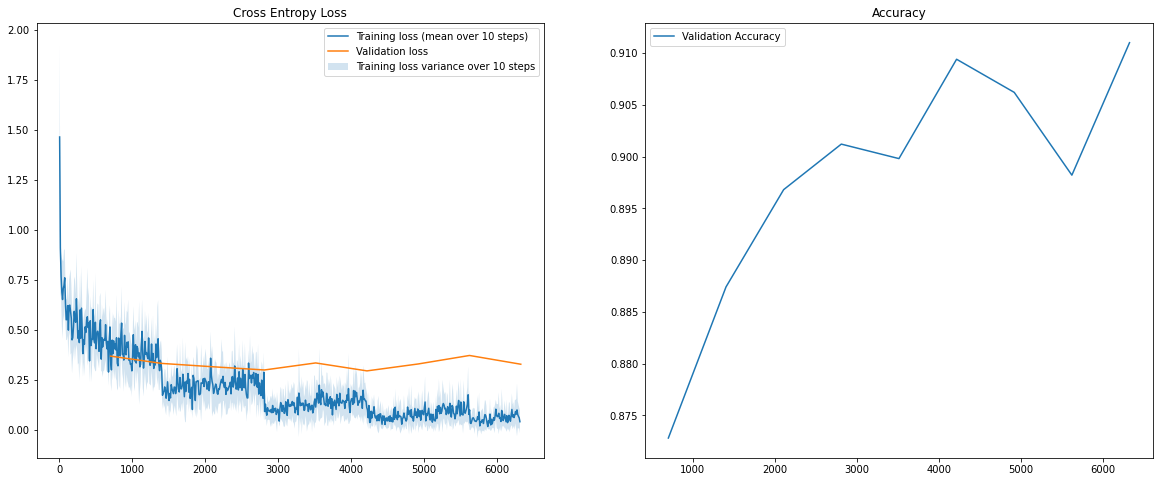

In [9]:
def create_plots(trainer: Trainer, name: str):
    os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
    plot_path = pathlib.Path("plots")
    plot_path.mkdir(exist_ok=True)
    # Save plots and show them
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.title("Cross Entropy Loss")
    utils.plot_loss(trainer.train_history["loss"], label="Training loss", npoints_to_average=10)
    utils.plot_loss(trainer.validation_history["loss"], label="Validation loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    utils.plot_loss(trainer.validation_history["accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.savefig(plot_path.joinpath(f"{name}_plot.png"))
    plt.show()
    
create_plots(trainer, "task4a")